# 1: TITANIC - predikce přežití pomocí ML modelu

- Úkol: Pomocí strojového učení vytvořte model, který bude predikovat custující přeživší z tragédie ztroskotání Titaniku.

- Modely:
    - Logistická regrese.
    - Naive Bayes.

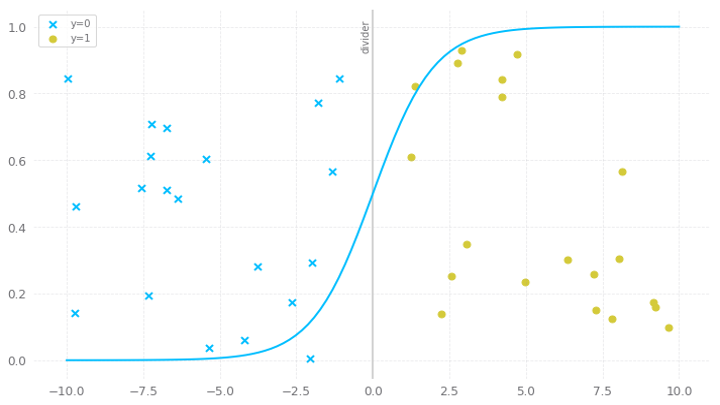

**POPIS DAT**
- ***PassengerId*** -> ID cestujícího
- ***Survived*** -> přeživší; **0 = Ne, 1 = ANO**
- ***Pclass*** -> Třída; **1 = první, 2 = druhá, 3 = třetí**
- ***Name*** -> Jméno
- ***Sex*** -> pohlaví; **female = žena, male = muž**
- ***Age*** -> Věk
- ***SibSp*** -> rodinní příslušníci; **počty sourozenců a nebo manželů**
- ***Parch*** -> rodinní příslušníci; **počty rodičů a nebo dětí**
- ***Ticket*** -> Číslo lístku
- ***Fare*** -> Jízdné/tarif cestujícího
- ***Cabin*** -> Číslo kabiny
- ***Fare*** -> Jízdné/tarif cestujícího
- ***Embarked*** -> Přístav nalodění; **C = Cherbourg, Q = Queenstown, S = Southampto**


# 2: Import knihoven a datasetu

In [ ]:
# Instalace knihoven
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
# Import klíčových knihoven
import pandas as pd # pro práci s tabulkovými daty -> přistupovat pomocí aliasu pd
import numpy as np # pro práci s vektory, maticemi a obecnými vícerozměrnými poli -> přístup pomocí alisu np
import matplotlib.pyplot as plt # pro vizualizaci dat a práce s grafy -> přístup pomocí alusi plt
import seaborn as sns # nadstavba matplotlib -> přístup pomocí aliasu sns

In [ ]:
# Kontrola souborů
!ls

In [ ]:
# Načtení dat ze souboru
titanic_df = pd.read_csv('titanic.csv')


In [ ]:
# Zobrazení, prozkoumání dat
titanic_df

In [ ]:
# Zobrazení prvních 7 řádek
titanic_df.head(7)

**TASK 1**
- **Zobrazte posledních 7 řádků tabulky**
- pomocí funkce: **titanic_df.tail(n)**

In [ ]:
# Zobrazení posledních 7 řádků
# začátek vlastního kódu:

titanic_df.tail(n)

# konec vlastního kódu

# 3: Explorativní průzkum dat

In [ ]:
# Vytvoření tabulek s přeživšími a nepřeživšími pasažery

# Přeživší pasažéři 
survived_df = titanic_df[titanic_df['Survived'] == 1]

# Přeživší pasažéři
no_survived_df = titanic_df[titanic_df['Survived'] == 0]

In [ ]:
# Zobrazení přeživších 
survived_df.head()

**TASK 2**
- Zobrazte tabulku s 10 záznamy pro nepřeživší **pasažery**
- pomocí funkce: **no_survived_df.head(n)**

In [ ]:
# Zobrazení 10 záznamů pro nepřeživší:
# začátek vlastního kódu:

no_survived_df.head(n)

# konec vlastního kódu

In [ ]:
# Count the survived and deceased 
print("Celkem záznamů =", len(titanic_df))
print("--------------------","\n")

print("Přeživší")
print("--------")
print("Celkový počet přeživších =", len(survived_df))
print("Procento přeživších =", round(len(survived_df)/len(titanic_df) * 100.0, 2), "%","\n")

print("Nepřeživší")
print("----------")
print("Celkový počet nepřeživších =", len(no_survived_df))
print("Procento nepřeživších =", round(len(no_survived_df)/len(titanic_df) * 100.0, 2), "%")
         

In [ ]:
# Zobrazení a počet pasažérů napříč třídami

# Počet pasažerů v jednotlivých třídách
print("Počet pasažérů ve 1st class:", len(titanic_df[titanic_df['Pclass'] == 1]))
print("Počet pasažérů ve 2nd class:", len(titanic_df[titanic_df['Pclass'] == 2]))
print("Počet pasažérů ve 3rd class:", len(titanic_df[titanic_df['Pclass'] == 3]),"\n")

plt.figure(figsize = [9,6])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = titanic_df)

plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_df)

**CVIČENÍ 3**
- Z grafu: Je větší pravděpodobnost přežití, pokud máte jednoho příbuzného nebo žádného?

In [ ]:
# Zobrazení a počet v závislosti na počtu příbuzných
plt.figure(figsize = [9,6])
plt.subplot(211)
sns.countplot(x = 'SibSp', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data = titanic_df)

In [ ]:
# Statistika přeživších dle počtu příbuzných

sibsp_0_df = titanic_df[titanic_df['SibSp'] == 0]
sibsp_1_df = titanic_df[titanic_df['SibSp'] == 1]


sibsp_survived_0_df = sibsp_0_df[sibsp_0_df['Survived'] == 1]
sibsp_survived_1_df = sibsp_1_df[sibsp_1_df['Survived'] == 1]

print("Počet příbuzných: 0")
print("-------------------")
print("Počet přeživších =", len(sibsp_survived_0_df))
print("Procento přeživších =", round(len(sibsp_survived_0_df)/len(sibsp_0_df) * 100.0, 2), "%","\n")

print("Počet příbuzných: 1")
print("-------------------")
print("Počet přeživších =", len(sibsp_survived_1_df))
print("Procento přeživších =", round(len(sibsp_survived_1_df)/len(sibsp_1_df) * 100.0, 2), "%")

**CVIČENÍ 4**
- Udělejte vizualizaci dat pro přeživší v závislosti na pohlaví.
- Nahraďte **xxx** parametrem pro pohlaví ve funkcích: 
- - sns.countplot(x = **'xxx'**, data = titanic_df)
- - sns.countplot(x = **'xxx'**, hue = 'Survived', data = titanic_df)


In [ ]:
# Počet žen a mužů
print("Počet žen:", len(titanic_df[titanic_df['Sex'] == "female"]))
print("Počet mužů:", len(titanic_df[titanic_df['Sex'] == 'male']),"\n")


# Zobrazení ženy a muži
plt.figure(figsize = [9, 6])
plt.subplot(211)
sns.countplot(x = 'Xxx', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'Xxx', hue = 'Survived', data = titanic_df)

In [ ]:
# Zobrazení rozložení věku pasažérů - pomocí histogramu 
plt.figure(figsize = [9, 6])
sns.histplot(titanic_df['Age'],bins = 60, kde=True, stat="density")

# 4: Data cleaning and feature engineering

In [ ]:
# Informace a datasetu
titanic_df.info()

In [ ]:
# Počet nulových/chybějících hodnot
titanic_df.isnull().sum()

In [ ]:
# Zobrazení nulových/chybějících hodnot
plt.figure(figsize = [9, 6])
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Odstranění sloupce "Cabin" s nenulovými hodnotami
titanic_df.drop(['Age','Cabin'], axis = 1, inplace = True)

In [ ]:
# Zobrazení korelační matice -> nalezení vnitřních závislostí mezi parametry -> pro možnost snížení dimenze vstupních dat
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(titanic_df.corr(),linewidths=2,cmap=plt.cm.Blues,annot=True,annot_kws={'size': 10},ax=ax)

In [ ]:
# Zobrazení dat bez "Cabin" a "Age" -> lze některé parametry "vyhodit"?
titanic_df.head()

**CVIČENÍ 5**
- Odstraňte parametry (sloupce), které dle vizuálního zobrazení z předešlé tabulky nemají žádnou vypovídající hodnotu ve vztahu k řešené otázce.
- Odstraňte *par1, par2, par3 a par4* v následující funkci: 
- - titanic_df.drop(**['par1', 'par2', 'par3', 'par4']**, axis = 1, inplace = True)

In [ ]:
# Odstraňte parametry
#titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)
titanic_df.drop(['par1', 'par2', 'par3', 'par4'], axis = 1, inplace = True)

In [ ]:
# Zobrazení nulových/chybějících hodnot ještě jednou

# Počet nulových/chybějících hodnot
print("Počet nulových/chybějících hodnot")
print("---------------------------------")
print(titanic_df.isnull().sum(),"\n")


plt.figure(figsize = [9, 6])
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
# Zobrazení dat - co ještě musíme změnit?
titanic_df.head()

In [ ]:
# Rozdělení sloupce Sex na femela a male
pd.get_dummies(titanic_df['Sex'])

In [ ]:
# paramter male jako sloupec zda muž == 1 nebo žena == 0
male = pd.get_dummies(titanic_df['Sex'], drop_first = True)
male

# Odstranění sloupce 'Sex' 
titanic_df.drop(['Sex'], axis = 1, inplace = True)

# Vložení sloupce s hodnotami male místo za sloupec 'Sex'
titanic_df = pd.concat([titanic_df, male], axis = 1)

In [ ]:
# Zobrazení dat -> data připravená pro trénování ML modelu
titanic_df.head(7)

# 5: Trénování klasifikačního modelu založeného na Logistické regresi
- Vytvoření popisných dat -> ze sloupce 'Survived':
  - 'Survived' == 0 -> nepřeživší
  - 'Survived' == 1 -> přeživší

- Rozdělení na dat na trénovací a testovací v poměru (80:20)

- Trénování logistické regrese pomocí výrazu:
  - **classifier.fit(X_train, y_train)**

- Import knihovny scikit-learn: modely machine learningu pro python

- Evaluace natrénovaného modelu pomocí konfuzní matice a klasifikačního reportu

In [ ]:
#Příprava dat -> vytvoření popisná data
X = titanic_df.drop('Survived', axis = 1).values
y = titanic_df['Survived'].values


In [ ]:
# Rozdělení dat na trénovací a testovací
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Logistická regrese
from sklearn.linear_model import LogisticRegression # Import logistické regrese

# Trénování logistické regrese
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)


# 6: Evaluace natrénovaného klasifikačního modelu Logistické regrese
- Import knihovny scikit-learn: modely machine learningu pro python

- Evaluace natrénovaného modelu pomocí konfuzní matice a klasifikačního reportu

In [ ]:
# Predikce výstupů na testovací množině dat
y_predict_test_lr = classifier_lr.predict(X_test)

# Predikované hodnoty
y_predict_test_lr

In [ ]:
# Reálné hodnoty 
y_test

In [ ]:
# Zobrazení konfusní matice –> matice "záměn"
from sklearn.metrics import confusion_matrix

plt.figure(figsize = [6, 4])
cm = confusion_matrix(y_test, y_predict_test_lr)
sns.heatmap(cm, annot = True, annot_kws={'size': 10}, fmt = "d", cmap="Blues", linewidth = 5)

In [ ]:
# Popisná statistika úspěšnosti klasifikátoru logistické regrese
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test_lr))

# 7: Evaluace natrénovaného klasifikačního modelu Logistické regrese
- Natrénujte Naive Bayes Klasifikátor za použití Scikit-learn.

- Zobrazte konfusní matici.

- Vypište klasifikační report.

**CVIČENÍ 5**
- **Srovnejte oba dva typy klasifikátorů**

In [ ]:
# Trénování Naive Bayes
from sklearn.naive_bayes import MultinomialNB # Import typ Multinomial Naive Bayes

# Trénování Naive Bayes
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)


In [ ]:
# Predikce výstupů z Naive Bayes na testovací množině dat
y_predict_test_nb = classifier_nb.predict(X_test)

# Predikované hodnoty
y_predict_test_nb

In [ ]:
# Zobrazení konfusní matice –> matice "záměn"
from sklearn.metrics import confusion_matrix

plt.figure(figsize = [6, 4])
cm = confusion_matrix(y_test, y_predict_test_nb)
sns.heatmap(cm, annot = True, annot_kws={'size': 10}, fmt = "d", cmap="Blues", linewidth = 5)

In [ ]:
# Popisná statistika úspěšnosti klasifikátoru Naive Bayes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test_nb))

**CVIČENÍ 6**
- **Vyzkoušet vlastní predikci přežití** 
- ***Pclass*** -> Třída; **1 = první, 2 = druhá, 3 = třetí**
- ***SibSp*** -> rodinní příslušníci; **počty sourozenců a nebo manželů**
- ***Parch*** -> rodinní příslušníci; **počty rodičů a nebo dětí**
- ***Fare*** -> Jízdné/tarif cestujícího
- ***male*** -> 0 = žena, 1 = muž

In [ ]:
# Doplňte vlastní data
'''
data_vlastni = {'Pclass': 1, 'SibSp': 3, 'Parch': 2, 'Fare': 50.52, 'male': 0}
'''
data_vlastni = {'Pclass': 0, 'SibSp': 0, 'Parch': 0, 'Fare': 0.00, 'male': 0}

vals = np.array(list(data_vlastni.values()))

In [ ]:
# Predikce vlastních dat
predikce_test = classifier_lr.predict(vals.reshape(1, -1))
print("Předpoklad přežití je:",predikce_test[0])